In [47]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, root_scalar

In [ ]:
def plot(file):
    

In [27]:
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x-b, 2)/(2*np.power(c, 2)))

In [34]:
def lorentzian(x, a, x0, gamma):
    return a/np.pi*(gamma/(np.power(x-x0, 2)+np.power(gamma, 2)))

In [37]:
def line(x, a, b):
    return x*a+b

In [48]:
def lorentzian_offset(x, a, x0, gamma, offset):
    return lorentzian(x, a, x0, gamma) + offset

<KeysViewHDF5 ['FileType', 'Frame', 'Waveforms']>
<KeysViewHDF5 ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']>
4.678896512102293


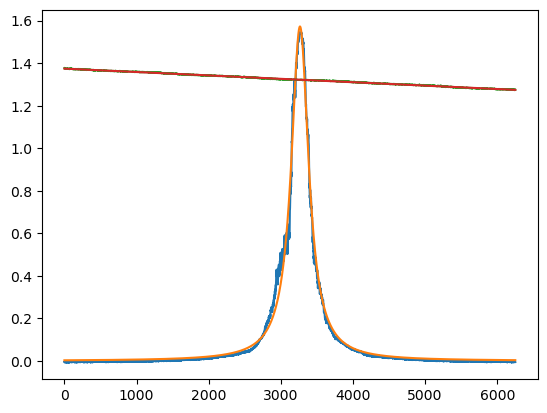

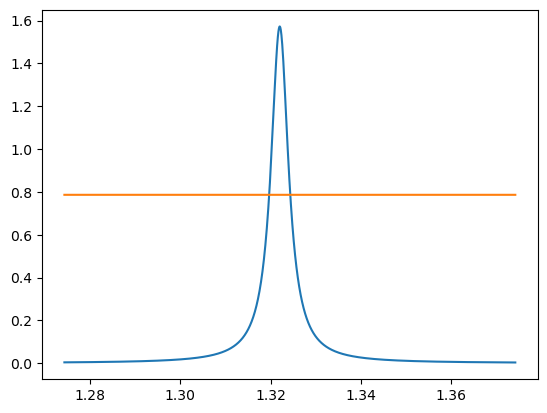

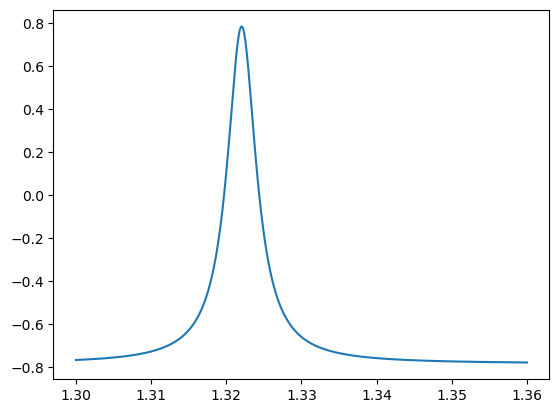

In [65]:
scopes = range(52, 85)

fwhms = []

for scope in scopes:
    filename = f"data/scope_{scope}.h5"
    plt.figure()
    with h5py.File(filename, "r") as file:
        print(file.keys())
        print(file["Waveforms"].keys())
        
        reflection = np.array(file["Waveforms"]["Channel 1"]["Channel 1 Data"])
        x = np.array(range(reflection.shape[0]))

        piezo_voltage = np.array(file["Waveforms"]["Channel 3"]["Channel 3 Data"])
        
        popt, pcov = curve_fit(lorentzian, x, reflection, (1.4, 3500, 1000))
        popt_line, pcov_live = curve_fit(line, x, piezo_voltage)

        ideal_reflection = lorentzian(x, popt[0], popt[1], popt[2])
        ideal_voltage = line(x, *popt_line)

        plt.plot(reflection)
        plt.plot(ideal_reflection)
        plt.plot(piezo_voltage)
        plt.plot(ideal_voltage)
        plt.figure()
        plt.plot(ideal_voltage, ideal_reflection)
        plt.plot(ideal_voltage, np.ones_like(x)*max(ideal_reflection)/2)
        
        # plt.figure()
        # v = np.linspace(0, 6000, 1000)
        # v1 = np.linspace(1.3, 1.36, 500)

        f =  lambda y: lorentzian_offset((y-popt_line[1])/popt_line[0], popt[0], popt[1], popt[2], -max(ideal_reflection)/2)

        # plt.plot(line(v, *popt_line), f(v))
        # plt.plot(v1, f(v1))


        # find the crossing:
        root1 = root_scalar(f, bracket=[1.31, 1.32])
        root2 = root_scalar(f, bracket=[1.32,1.35])
        fwhm = root2.root - root1.root

        fwhms.append(fwhm*1000)

        print(fwhm*1000)
        # print(popt)
        # plt.plot()
    